<a href="https://colab.research.google.com/github/ParamitaDas18/ML_Lab_Codes/blob/main/Q12_Iris_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

'iris dataset.txt'   sample_data


In [2]:
# ------------------------------
# Multilayer Perceptron on Iris Dataset
# ------------------------------
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("iris_dataset.csv")
X = df.drop('target', axis=1).values
y = df['target'].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# ------------------------------
# MLP Model
# ------------------------------
class MLP(nn.Module):
    def _init_(self, activation_fn):
        super(MLP, self)._init_()
        self.fc1 = nn.Linear(4, 5)   # 4 inputs → 5 hidden neurons
        self.fc2 = nn.Linear(5, 3)   # 5 hidden → 3 output classes
        self.activation = activation_fn

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x

# ------------------------------
# Try different combinations
# ------------------------------
activations = {
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh(),
    "ReLU": nn.ReLU()
}

optimizers = ["GD", "SGD", "Adam"]
loss_types = {"MSE": nn.MSELoss(), "CrossEntropy": nn.CrossEntropyLoss()}

results = []

for act_name, act_fn in activations.items():
    for opt_name in optimizers:
        for loss_name, loss_fn in loss_types.items():

            # Model
            model = MLP(act_fn)

            # Optimizer selection
            if opt_name == "GD":
                optimizer = optim.SGD(model.parameters(), lr=0.01)
            elif opt_name == "SGD":
                optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
            elif opt_name == "Adam":
                optimizer = optim.Adam(model.parameters(), lr=0.01)

            # CrossEntropy expects integer labels; MSE expects one-hot → adjust
            if loss_name == "MSE":
                y_train_input = torch.nn.functional.one_hot(y_train, num_classes=3).float()
            else:
                y_train_input = y_train

            losses = []
            accuracies = []

            # Train
            for epoch in range(300):
                optimizer.zero_grad()
                outputs = model(X_train)

                loss = loss_fn(outputs, y_train_input)
                loss.backward()
                optimizer.step()

                _, prediction = torch.max(outputs, 1)
                acc = accuracy_score(y_train, prediction)

                losses.append(loss.item())
                accuracies.append(acc)

            # Test Performance
            preds = torch.argmax(model(X_test), 1)
            test_acc = accuracy_score(y_test, preds)

            results.append((act_name, opt_name, loss_name, test_acc))

            print(f"{act_name} + {opt_name} + {loss_name} → Test Accuracy: {test_acc:.4f}")

            # Plot loss and accuracy
            plt.figure()
            plt.title(f"{act_name} + {opt_name} + {loss_name} — Loss Curve")
            plt.plot(losses)
            plt.xlabel("Epochs")
            plt.ylabel("Loss")
            plt.show()

            plt.figure()
            plt.title(f"{act_name} + {opt_name} + {loss_name} — Accuracy Curve")
            plt.plot(accuracies)
            plt.xlabel("Epochs")
            plt.ylabel("Accuracy")
            plt.show()

print("\n✅ Experiment Completed!")
print("Top Results:")
for r in sorted(results, key=lambda x: x[3], reverse=True)[:5]:
    print(r)

FileNotFoundError: [Errno 2] No such file or directory: 'iris_dataset.csv'

Sigmoid + GD + MSE → Test Accuracy: 1.0000


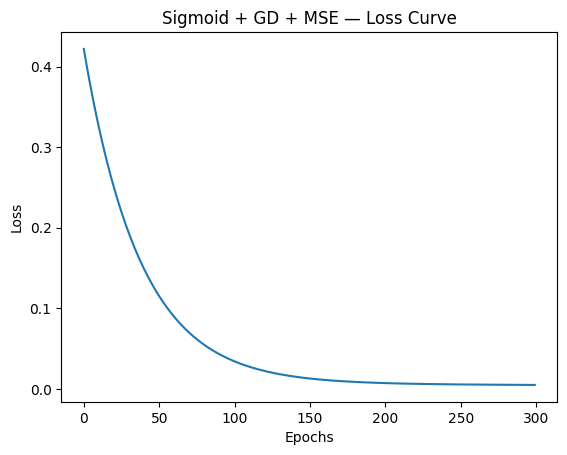

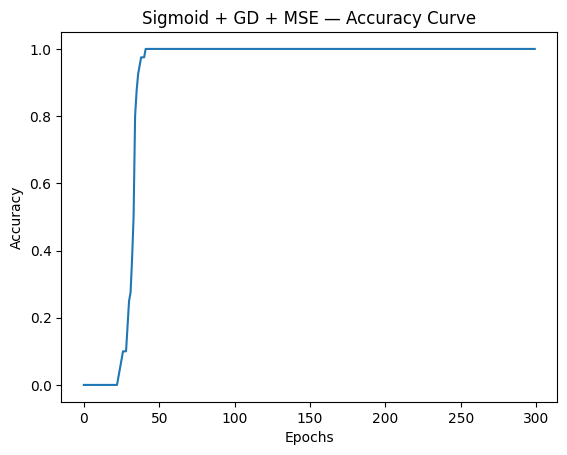

Sigmoid + GD + CrossEntropy → Test Accuracy: 1.0000


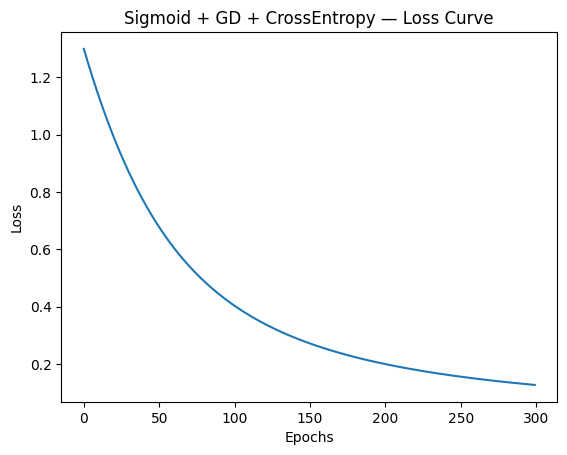

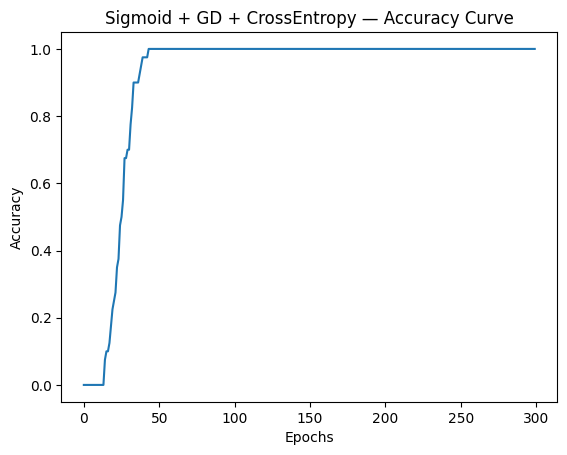

Sigmoid + SGD + MSE → Test Accuracy: 1.0000


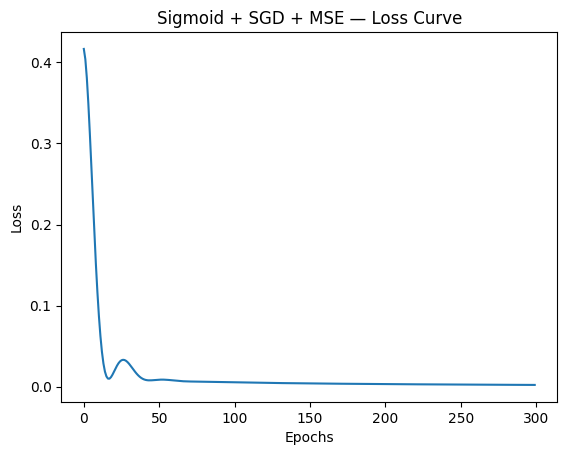

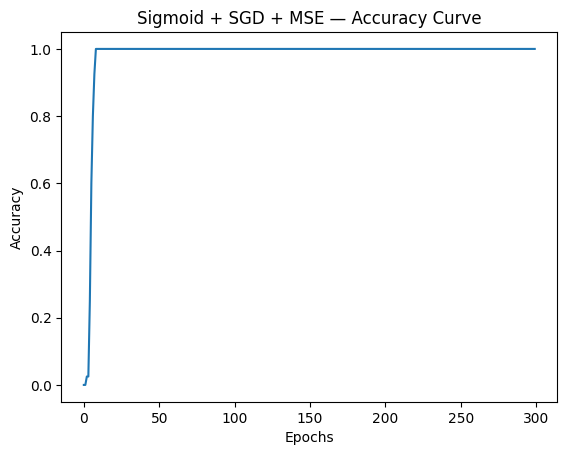

Sigmoid + SGD + CrossEntropy → Test Accuracy: 1.0000


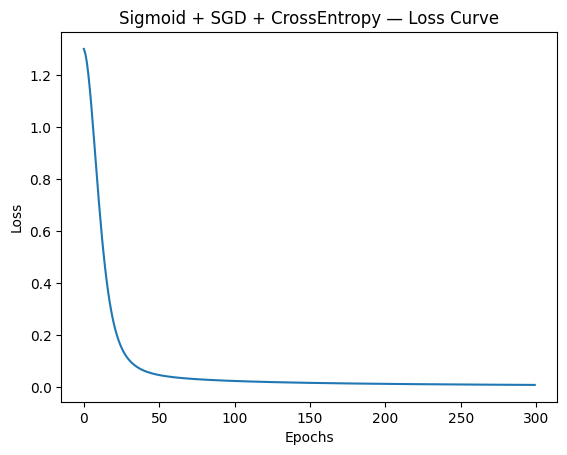

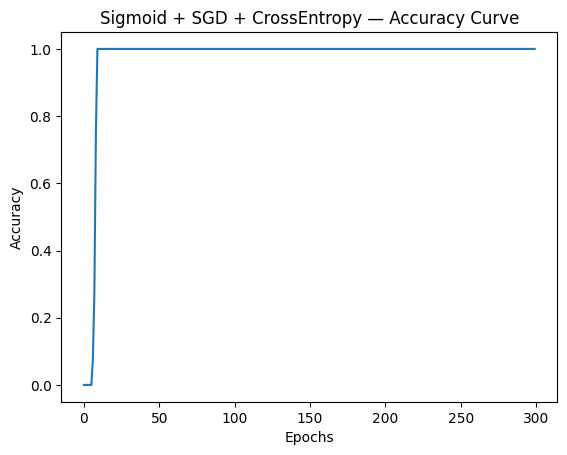

Sigmoid + Adam + MSE → Test Accuracy: 1.0000


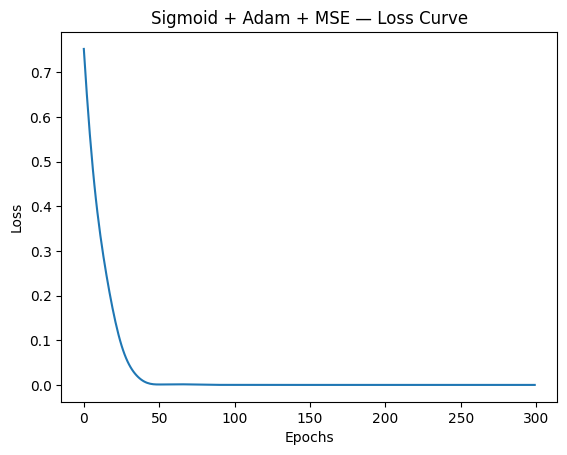

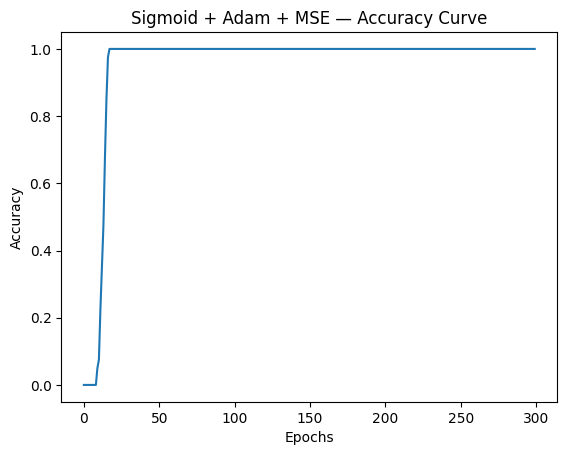

Sigmoid + Adam + CrossEntropy → Test Accuracy: 1.0000


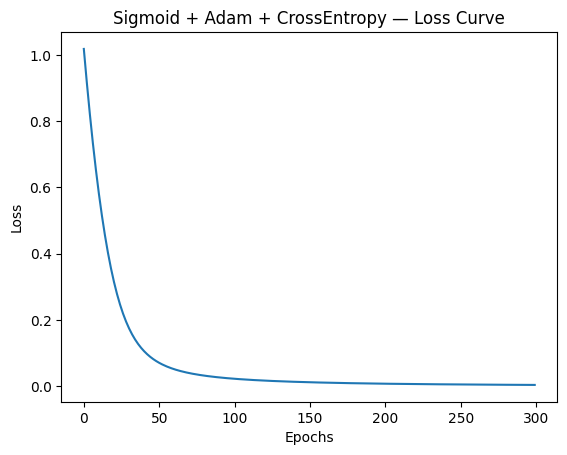

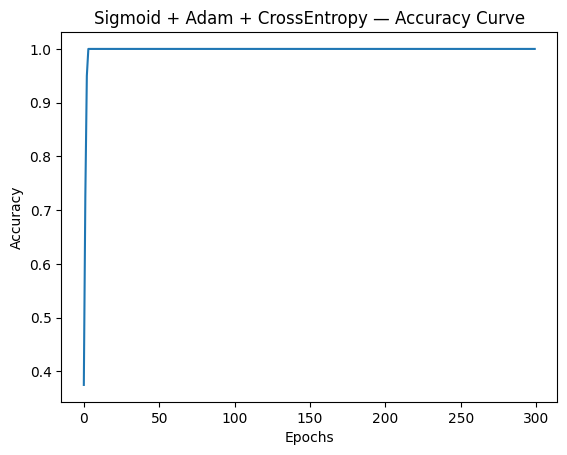

Tanh + GD + MSE → Test Accuracy: 1.0000


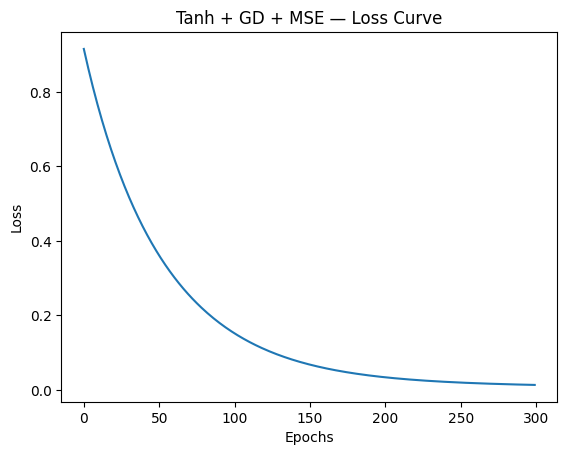

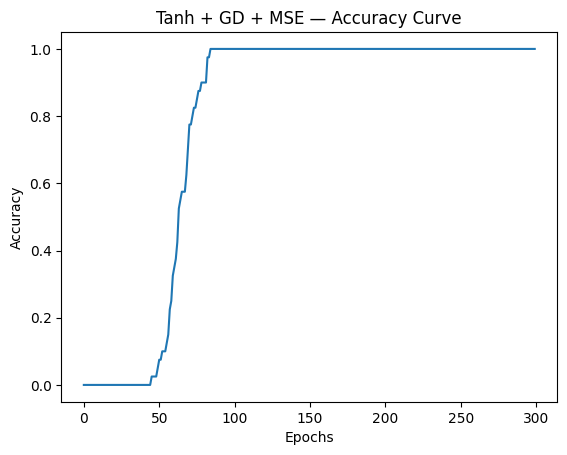

Tanh + GD + CrossEntropy → Test Accuracy: 1.0000


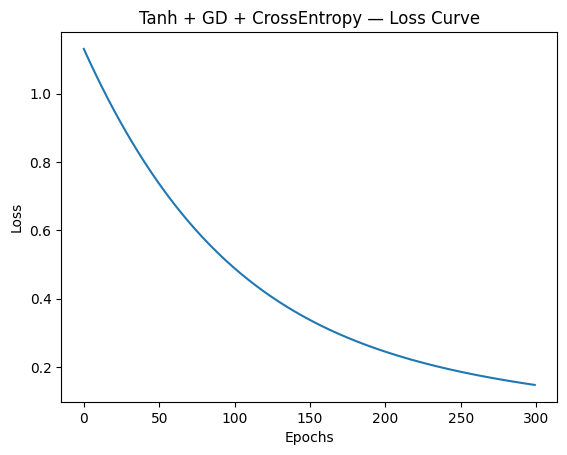

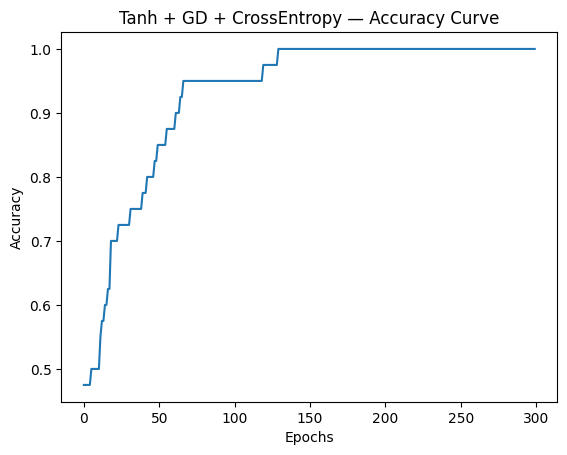

Tanh + SGD + MSE → Test Accuracy: 1.0000


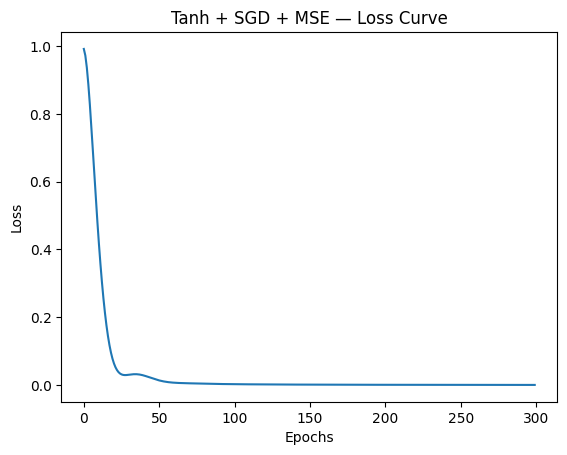

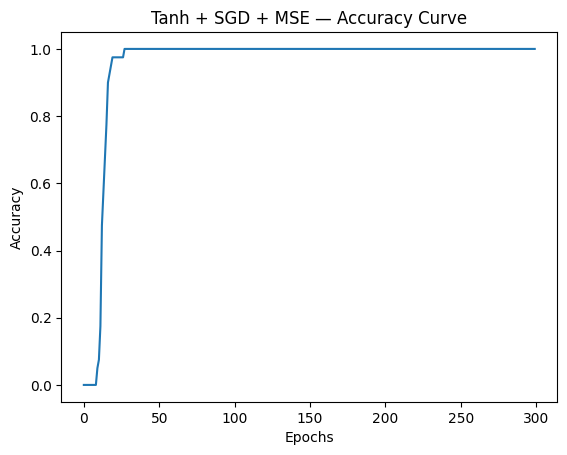

Tanh + SGD + CrossEntropy → Test Accuracy: 1.0000


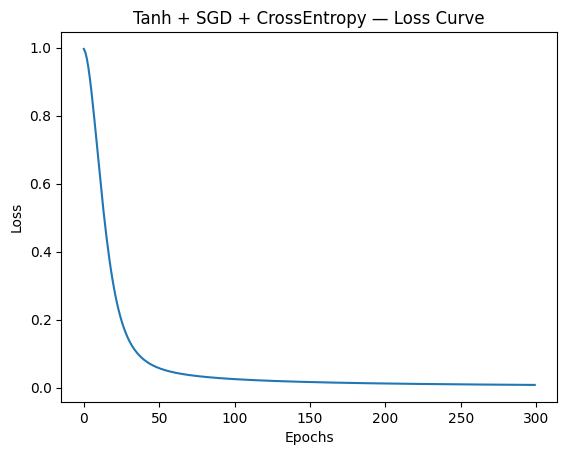

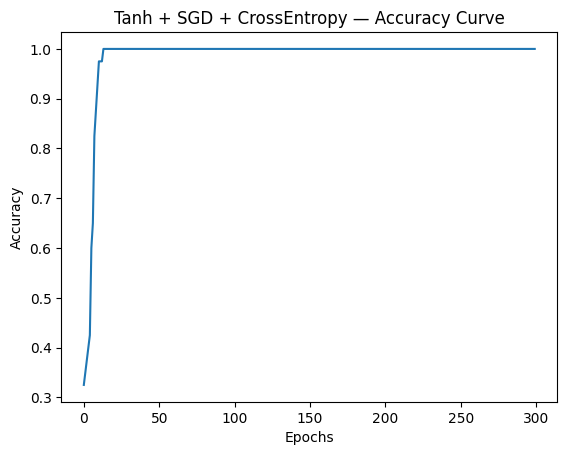

Tanh + Adam + MSE → Test Accuracy: 1.0000


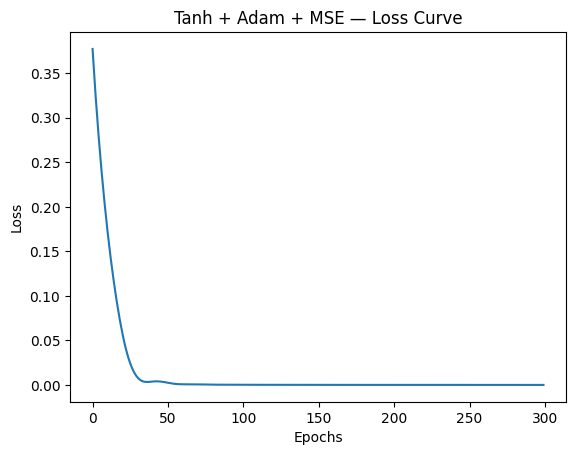

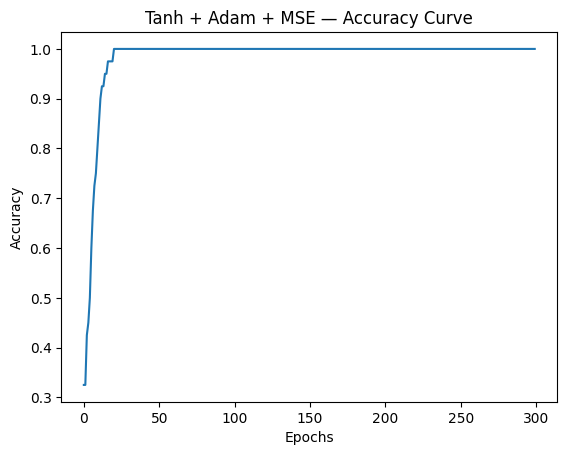

Tanh + Adam + CrossEntropy → Test Accuracy: 1.0000


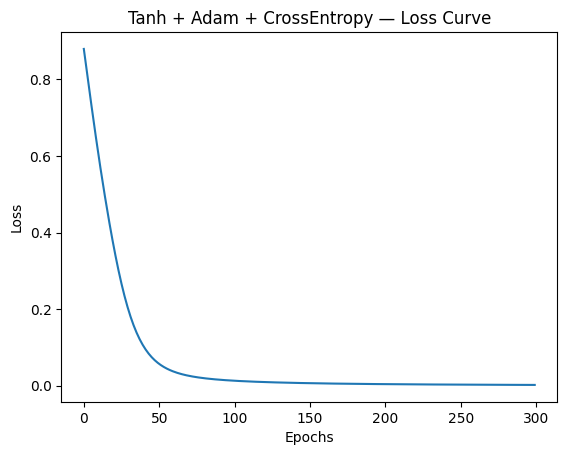

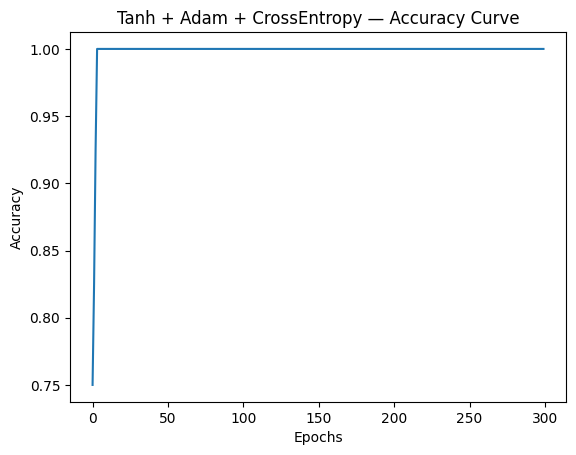

ReLU + GD + MSE → Test Accuracy: 1.0000


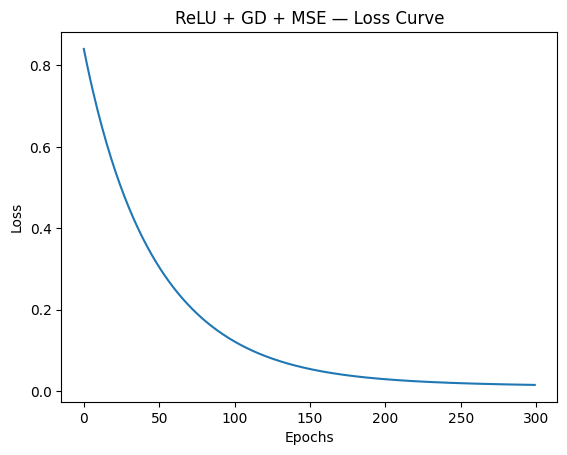

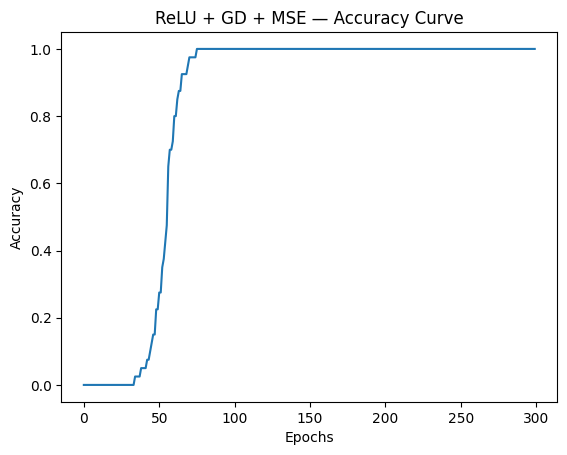

ReLU + GD + CrossEntropy → Test Accuracy: 1.0000


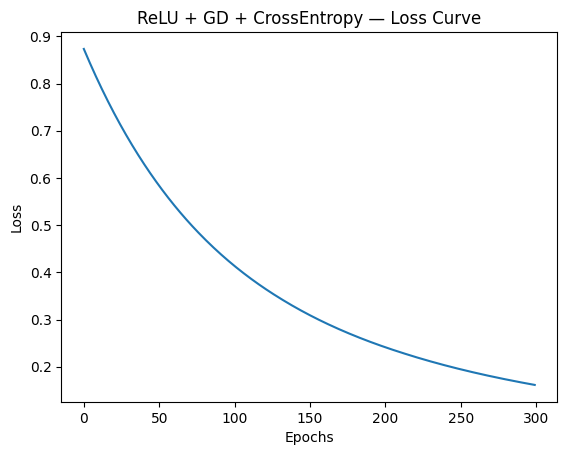

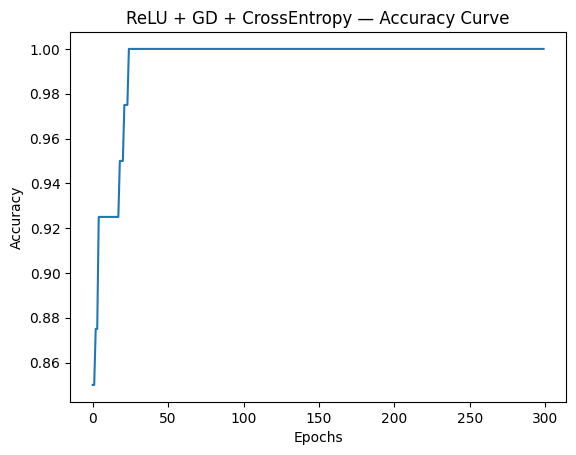

ReLU + SGD + MSE → Test Accuracy: 1.0000


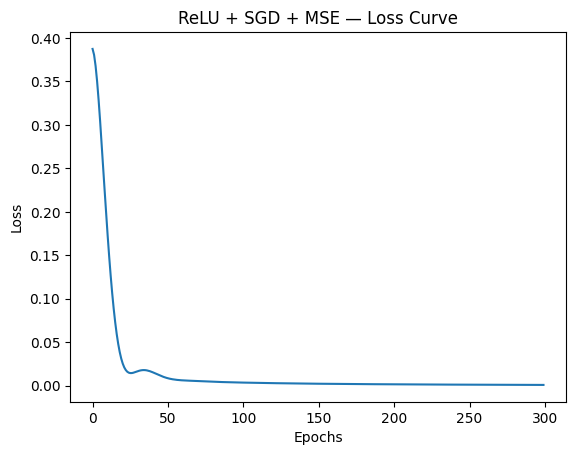

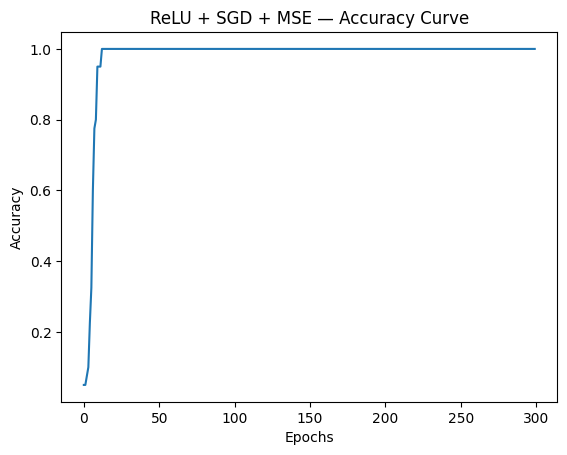

ReLU + SGD + CrossEntropy → Test Accuracy: 1.0000


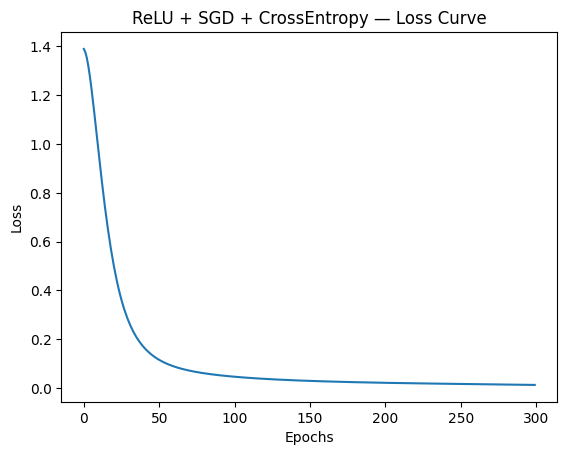

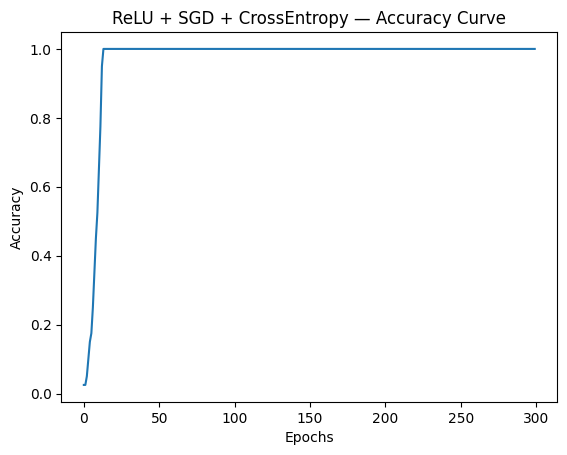

ReLU + Adam + MSE → Test Accuracy: 1.0000


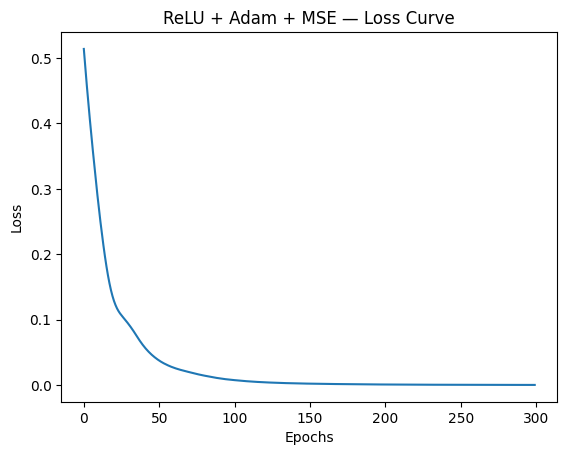

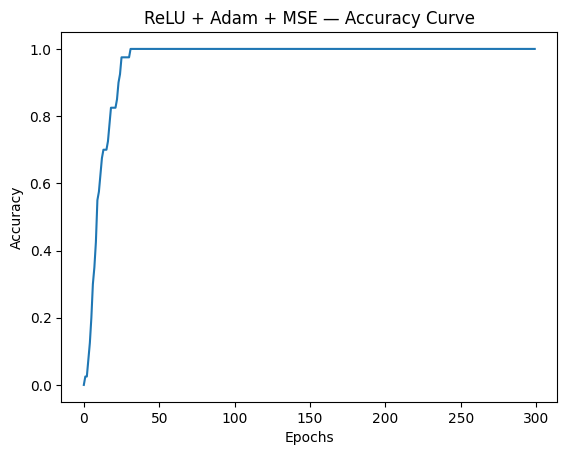

ReLU + Adam + CrossEntropy → Test Accuracy: 1.0000


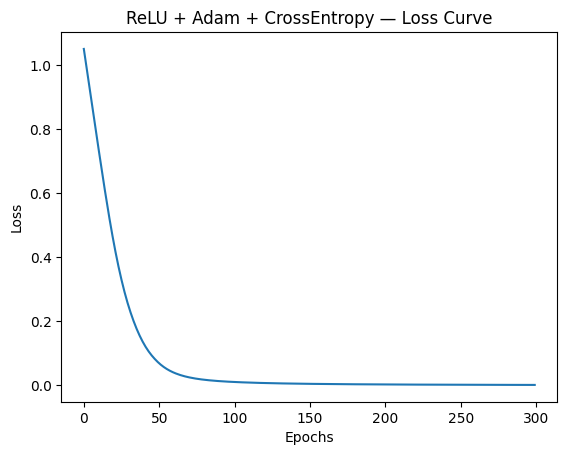

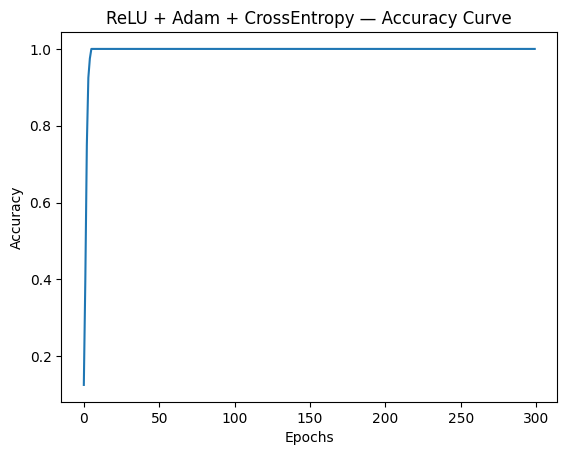


✅ Experiment Completed!
Top Results:
('Sigmoid', 'GD', 'MSE', 1.0)
('Sigmoid', 'GD', 'CrossEntropy', 1.0)
('Sigmoid', 'SGD', 'MSE', 1.0)
('Sigmoid', 'SGD', 'CrossEntropy', 1.0)
('Sigmoid', 'Adam', 'MSE', 1.0)


In [3]:
# ------------------------------
# Multilayer Perceptron on Iris Dataset
# ------------------------------
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
# Corrected filename based on the output of cell kMn_6oEfjVkL
df = pd.read_csv("iris dataset.txt")
# Assuming the last column is the target and the rest are features
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# ------------------------------
# MLP Model
# ------------------------------
class MLP(nn.Module):
    # Corrected __init__ method
    def __init__(self, activation_fn):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(4, 5)   # 4 inputs → 5 hidden neurons
        self.fc2 = nn.Linear(5, 3)   # 5 hidden → 3 output classes
        self.activation = activation_fn

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x

# ------------------------------
# Try different combinations
# ------------------------------
activations = {
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh(),
    "ReLU": nn.ReLU()
}

optimizers = ["GD", "SGD", "Adam"]
# Ensure that the loss function keys are consistent with the code
loss_types = {"MSE": nn.MSELoss(), "CrossEntropy": nn.CrossEntropyLoss()}

results = []

for act_name, act_fn in activations.items():
    for opt_name in optimizers:
        for loss_name, loss_fn in loss_types.items():

            # Model
            model = MLP(act_fn)

            # Optimizer selection
            if opt_name == "GD":
                optimizer = optim.SGD(model.parameters(), lr=0.01)
            elif opt_name == "SGD":
                optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
            elif opt_name == "Adam":
                optimizer = optim.Adam(model.parameters(), lr=0.01)

            # CrossEntropy expects integer labels; MSE expects one-hot → adjust
            if loss_name == "MSE":
                # MSELoss expects float inputs and targets
                y_train_input = torch.nn.functional.one_hot(y_train, num_classes=3).float()
            else:
                # CrossEntropyLoss expects float inputs and long targets
                y_train_input = y_train

            losses = []
            accuracies = []

            # Train
            for epoch in range(300):
                optimizer.zero_grad()
                outputs = model(X_train)

                loss = loss_fn(outputs, y_train_input)
                loss.backward()
                optimizer.step()

                _, prediction = torch.max(outputs.data, 1) # Use outputs.data to avoid tracking history
                # Convert predicted labels to numpy for accuracy_score
                prediction_np = prediction.cpu().numpy()
                acc = accuracy_score(y_train.cpu().numpy(), prediction_np)


                losses.append(loss.item())
                accuracies.append(acc)

            # Test Performance
            # Use torch.no_grad() for inference
            with torch.no_grad():
                preds = torch.argmax(model(X_test), 1)
                test_acc = accuracy_score(y_test.cpu().numpy(), preds.cpu().numpy()) # Convert to numpy for accuracy_score


            results.append((act_name, opt_name, loss_name, test_acc))

            print(f"{act_name} + {opt_name} + {loss_name} → Test Accuracy: {test_acc:.4f}")

            # Plot loss and accuracy
            plt.figure()
            plt.title(f"{act_name} + {opt_name} + {loss_name} — Loss Curve")
            plt.plot(losses)
            plt.xlabel("Epochs")
            plt.ylabel("Loss")
            plt.show()

            plt.figure()
            plt.title(f"{act_name} + {opt_name} + {loss_name} — Accuracy Curve")
            plt.plot(accuracies)
            plt.xlabel("Epochs")
            plt.ylabel("Accuracy")
            plt.show()

print("\n✅ Experiment Completed!")
print("Top Results:")
for r in sorted(results, key=lambda x: x[3], reverse=True)[:5]:
    print(r)

In [4]:
for name, param in model.named_parameters():
    print(name, param.data)

fc1.weight tensor([[ 0.4878, -0.7447, -1.0684,  0.7794],
        [-0.8852, -0.9649, -0.7500, -0.6689],
        [-0.4864,  0.6435,  0.4253, -1.0269],
        [ 0.9174,  1.1033,  0.6977,  0.3366],
        [ 0.1003, -0.1851, -0.2884,  0.2127]])
fc1.bias tensor([ 0.8245,  0.4749,  1.1970,  0.6210, -0.5743])
fc2.weight tensor([[ 0.3975,  1.0495,  0.7336,  1.1262, -0.0419],
        [-0.9669, -1.0511, -0.6837, -0.6794, -0.2563],
        [-1.1776, -0.2566, -0.7534, -0.3645,  0.2250]])
fc2.bias tensor([ 0.4000, -0.6594, -0.5477])
